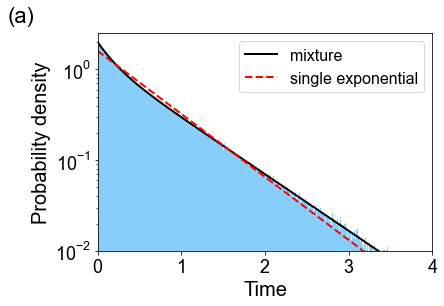

In [1]:
import random
import math
import numpy as np
import numpy.random as rnd
import matplotlib.pyplot as plt
import matplotlib.mathtext as mathtext

mathtext.FontConstantsBase.sup1 = 0.55
plt.rcParams["font.family"] = "sans-serif"
plt.rcParams["font.sans-serif"] = "Arial"
plt.rcParams['mathtext.fontset'] = "custom"
plt.rcParams["mathtext.rm"] = "Arial"
plt.rcParams['mathtext.it'] = 'Arial:italic'

a = 2 #rate from node being low active to high active
b = 1 #rate from node being high active to low active
tmin = 0
times = [tmin]
t = tmin
tmax = 800000 
N1 = 1 #'1'for node being high active, '0' for node being low active
N2 = 1 
N1_0 = N1 #initial state for node 1
N2_0 = N2 #initial state for node 2
t_list = [0]

node_1_on_rate = 0
node_1_off_rate = b
node_2_on_rate = 0
node_2_off_rate = b
total_rate = node_1_on_rate + node_1_off_rate + node_2_on_rate + node_2_off_rate
delay = random.expovariate(total_rate)
t += delay

while t<tmax:
    events = ['node1on', 'node1off', 'node2on', 'node2off'] #choose the next event based on its probability
    rand = random.choices(events, weights = [node_1_on_rate, node_1_off_rate, node_2_on_rate, node_2_off_rate], k=1)
    if rand == ['node1on']:
        N1 = 1
        node_1_on_rate = 0
        node_1_off_rate = b
        if N2 == 1:
            t_list.append(t)
        times.append(t)
        
    elif rand == ['node1off']:
        N1 = 0
        node_1_on_rate = a
        node_1_off_rate = 0
        if N2 == 1:
            t_list.append(t)
        times.append(t)
        
    elif rand == ['node2on']:
        N2 = 1
        node_2_on_rate = 0
        node_2_off_rate = b
        if N1 == 1:
            t_list.append(t)
        times.append(t)
        
    else:
        N2 = 0
        node_2_on_rate = a
        node_2_off_rate = 0
        if N1 == 1:
            t_list.append(t)
        times.append(t)
            
    total_rate = node_1_on_rate + node_1_off_rate + node_2_on_rate + node_2_off_rate
    delay = random.expovariate(total_rate)
    t += delay

n = len(t_list)
edge_closed_time = [] #collect data of duration for edge between two nodes being inactive

if (n % 2) == 0:
    if N1_0 == 1 and N2_0 == 1:
        for i in range(n // 2 - 1):
            ect = t_list[2*(i+1)] - t_list[2*(i+1)-1]
            edge_closed_time.append(ect)
    else:
        for i in range(n // 2):
            ect = t_list[2*i+1] - t_list[2*i]
            edge_closed_time.append(ect)
            
else:
    if N1_0 == 1 and N2_0 == 1:
        for i in range((n-1) // 2):
            ect = t_list[2*(i+1)] - t_list[2*(i+1)-1]
            edge_closed_time.append(ect)
    else:
        for i in range((n-1) // 2):
            ect = t_list[2*i+1] - t_list[2*i]
            edge_closed_time.append(ect)
        
data = np.array(edge_closed_time)

plt.hist(data, bins = 1000, density = 'True', color='lightskyblue', log=True)

A = (a**2+6*a*b+b**2)/4
C1 = a*(0.5+(a-b)/(4*np.sqrt(A)))*(1/(0.5*(3*a+b)-np.sqrt(A)))
C2 = a*(0.5-(a-b)/(4*np.sqrt(A)))*(1/(0.5*(3*a+b)+np.sqrt(A)))

lamda1 = 0.5*(3*a+b)-np.sqrt(A)
lamda2 = 0.5*(3*a+b)+np.sqrt(A)
lamda = (lamda1*lamda2)/(C1*lamda2+C2*lamda1)

t = np.arange(0.0, 30.0, 0.001)
y1 = C1*lamda1*np.exp(-lamda1*t)+C2*lamda2*np.exp(-lamda2*t) #mixture distribution
y2 = lamda*np.exp(-lamda*t) #single exponential

plt.tick_params(labelsize=18)
plt.semilogy(t,y1,linewidth=2,label='mixture',color='black')
plt.semilogy(t,y2,linestyle='dashed',linewidth=2,label='single exponential',color='r')
plt.text(-1.08, 3.3, '(a)', fontsize=22)
plt.xlim([0,4])
plt.ylim([0.01,2.5])
plt.xticks([0, 1, 2, 3, 4], ['0', '1', '2', '3', '4'])
plt.legend(fontsize=16)
plt.ylabel('Probability density', fontsize=20)
plt.xlabel('Time', fontsize=20)
plt.savefig('distribution2-1_semilog.pdf', bbox_inches = 'tight')
plt.show()

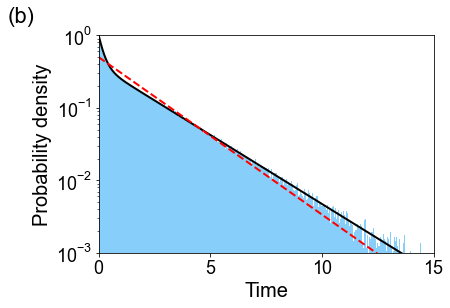

In [2]:
a = 1
b = 2
tmin = 0
times = [tmin]
t = tmin
tmax = 800000 
N1 = 1 
N2 = 1
N1_0 = N1
N2_0 = N2
t_list = [0]

node_1_on_rate = 0
node_1_off_rate = b
node_2_on_rate = 0
node_2_off_rate = b
total_rate = node_1_on_rate + node_1_off_rate + node_2_on_rate + node_2_off_rate
delay = random.expovariate(total_rate)
t += delay

while t<tmax:
    events = ['node1on', 'node1off', 'node2on', 'node2off'] #choose the next event based on its probability
    rand = random.choices(events, weights = [node_1_on_rate, node_1_off_rate, node_2_on_rate, node_2_off_rate], k=1)
    if rand == ['node1on']:
        N1 = 1
        node_1_on_rate = 0
        node_1_off_rate = b
        if N2 == 1:
            t_list.append(t)
        times.append(t)
        
    elif rand == ['node1off']:
        N1 = 0
        node_1_on_rate = a
        node_1_off_rate = 0
        if N2 == 1:
            t_list.append(t)
        times.append(t)
        
    elif rand == ['node2on']:
        N2 = 1
        node_2_on_rate = 0
        node_2_off_rate = b
        if N1 == 1:
            t_list.append(t)
        times.append(t)
        
    else:
        N2 = 0
        node_2_on_rate = a
        node_2_off_rate = 0
        if N1 == 1:
            t_list.append(t)
        times.append(t)
            
    total_rate = node_1_on_rate + node_1_off_rate + node_2_on_rate + node_2_off_rate
    delay = random.expovariate(total_rate)
    t += delay

n = len(t_list)
edge_closed_time = []

if (n % 2) == 0:
    if N1_0 == 1 and N2_0 == 1:
        for i in range(n // 2 - 1):
            ect = t_list[2*(i+1)] - t_list[2*(i+1)-1]
            edge_closed_time.append(ect)
    else:
        for i in range(n // 2):
            ect = t_list[2*i+1] - t_list[2*i]
            edge_closed_time.append(ect)
            
else:
    if N1_0 == 1 and N2_0 == 1:
        for i in range((n-1) // 2):
            ect = t_list[2*(i+1)] - t_list[2*(i+1)-1]
            edge_closed_time.append(ect)
    else:
        for i in range((n-1) // 2):
            ect = t_list[2*i+1] - t_list[2*i]
            edge_closed_time.append(ect)
        
data = np.array(edge_closed_time)

plt.hist(data, bins = 1000, density = 'True', color='lightskyblue', log=True)

A = (a**2+6*a*b+b**2)/4
C1 = a*(0.5+(a-b)/(4*np.sqrt(A)))*(1/(0.5*(3*a+b)-np.sqrt(A)))
C2 = a*(0.5-(a-b)/(4*np.sqrt(A)))*(1/(0.5*(3*a+b)+np.sqrt(A)))

lamda1 = 0.5*(3*a+b)-np.sqrt(A)
lamda2 = 0.5*(3*a+b)+np.sqrt(A)
lamda = (lamda1*lamda2)/(C1*lamda2+C2*lamda1)

t = np.arange(0.0, 30.0, 0.001)
y1 = C1*lamda1*np.exp(-lamda1*t)+C2*lamda2*np.exp(-lamda2*t)
y2 = lamda*np.exp(-lamda*t)

plt.tick_params(labelsize=18)
plt.semilogy(t,y1,linewidth=2,label='mixture',color='black')
plt.semilogy(t,y2,linestyle='dashed',linewidth=2,label='single exponential',color='r')
plt.text(-4.1, 1.5, '(b)', fontsize=22)
plt.xlim([0,15])
plt.ylim([0.001,1])
plt.xticks([0, 5, 10, 15], ['0', '5', '10', '15'])
plt.ylabel('Probability density', fontsize=20)
plt.xlabel('Time', fontsize=20)
plt.savefig('distribution1-2_semilog.pdf', bbox_inches = 'tight')
plt.show()